In [2]:
import nibabel as nib
import numpy as np 
import matplotlib.pyplot as plt


import cfl.util.brain_util as BU
import cfl.util.brain_vis as BV

In [3]:
# orientation and shape of atlas match the MRI images we've been looking at
nib_atlas = nib.load(os.path.join("PTSD_InVivoAtlas_labels.nii"))
print(nib.orientations.aff2axcodes(nib_atlas.affine))
print(nib_atlas.shape)

('R', 'P', 'S')
(124, 200, 82)


In [4]:
# load image in RAS orientation 
atlas = BU.load_brain(os.path.join("PTSD_InVivoAtlas_labels.nii"), ori='RAS')

In [5]:
print(np.unique(atlas))
print("Length:", len(np.unique(atlas)))
missing_vals = [14, 23, 24, 36, 56, 62]
print("Missing:", str(missing_vals))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  15.  16.  17.  18.  19.  20.  21.  22.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  57.  58.  59.  60.
  61.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.
  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103.
 104. 105. 106. 107. 108. 109. 110. 111.]
Length: 106
Missing: [14, 23, 24, 36, 56, 62]


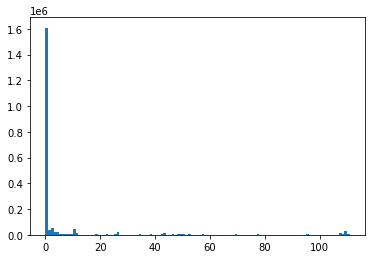

In [6]:
# #histogram of how many voxels are part of each region 
# plt.hist(BU.flatten(atlas), bins=111)
# plt.show()

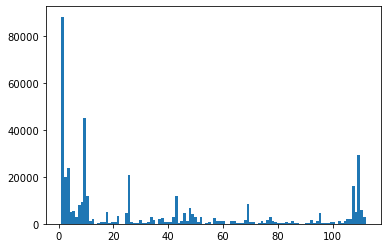

In [7]:
# # same histogram, excluding 0s (empty space)
# plt.hist(BU.flatten(atlas), bins=110, range=(1, 112))
# plt.show()

In [8]:
regions = (np.unique(atlas)[1:])

freqs = np.array([np.sum(np.equal(atlas, region)) for region in regions])

#sort in descending order
sort_inds = np.flip(np.argsort(freqs))
sorted_regions = regions.ravel()[sort_inds.reshape(regions.shape)]
sorted_freqs = freqs.ravel()[sort_inds.reshape(freqs.shape)]

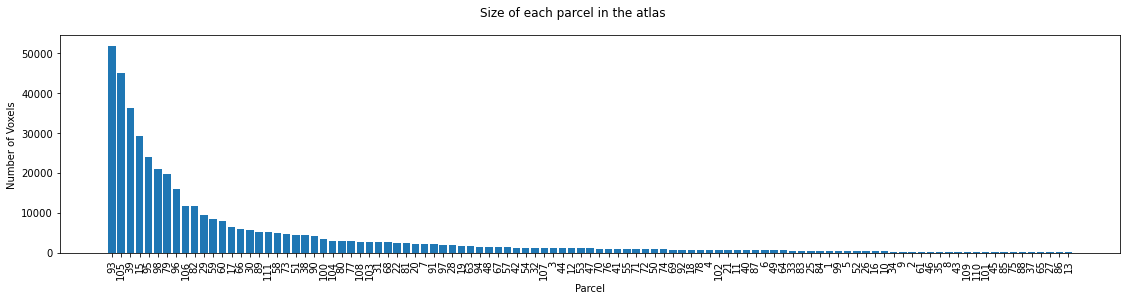

In [28]:
plt.figure(figsize=(19, 4))
plt.bar(sorted_regions.astype(int).astype(str), height=sorted_freqs)
plt.xticks(rotation=90)
plt.suptitle("Size of each parcel in the")
plt.ylabel("Number of Voxels")
plt.xlabel("Parcel")
plt.show()

In [11]:
# specify labels for plot (note the labels below are specifically for RAS orientation)
dir_labels = { 'saggital' :   ['P', 'A', 'D', 'V'],
               'coronal' :    ['L', 'R', 'D', 'V'],
               'horizontal' : ['L', 'R', 'A', 'P']} 

# generate interactive plots
# BV.plot_interactive_panels(BU.flatten(atlas), atlas.shape, np.ones(np.prod(atlas.shape)), figsize=(12, 3), colormap='nipy_spectral', std_scale='std', dir_labels=dir_labels)


In [12]:
# generate interactive plots
# BV.plot_interactive_panels(BU.flatten(atlas), atlas.shape, np.ones(np.prod(atlas.shape)), figsize=(12, 3), colormap='prism', std_scale='std', dir_labels=dir_labels)

# Visualize individual regions of atlas 

In [13]:
# mask_arr = np.zeros((len(np.unique(atlas)), BU.flatten(atlas).shape))
# # create masks for each region 
# for i in range(atlas.shape[0]): 
#     for j in range(atlas.shape[1]): 
#         for k in range(atlas.shape[2]): 
#             atlas[i, j, k]


In [14]:
### Region 2 (biggest)

# atlas2 = np.copy(atlas)
# current_regions= [2]
# for voxel in np.nditer(atlas2, op_flags=['readwrite']): 
#     if voxel not in current_regions: 
#         voxel[...] = 0
# for i in range(atlas.shape[0]): 
#     for j in range(atlas.shape[1]): 
#         for k in range(atlas.shape[2]):
#             voxel = atlas[i, j, k]
#             if voxel in np.unique(atlas)[:10]: 
#                 atlas2[i, j, k] = voxel
#             else: 
#                 atlas2[i, j, k] = 0 

# generate interactive plots
# BV.plot_interactive_panels(BU.flatten(atlas2), atlas.shape, np.ones(np.prod(atlas.shape)), figsize=(25, 10), colormap='tab20', std_scale='std', dir_labels=dir_labels)

In [15]:
### Top 3 regions

# region_mask = np.zeros(atlas.shape)
# # create masks for each region 
# current_regions= [1, 2, 10]
# for i in range(atlas.shape[0]): 
#     for j in range(atlas.shape[1]): 
#         for k in range(atlas.shape[2]): 
#             if atlas[i, j, k] in current_regions: 
#                 region_mask[i, j, k] = 1

# region_mask = np.ones(atlas.shape)
# current_regions= [1, 2, 10]
# print(current_regions)
# for mask_voxel, atlas_voxel in np.nditer([region_mask, atlas], op_flags=['readwrite']): 
#     if atlas_voxel not in current_regions: 
#         mask_voxel[...] = np.nan

# generate interactive plots
# BV.plot_interactive_panels(BU.flatten(atlas), atlas.shape, BU.flatten(region_mask), figsize=(20, 10), colormap='tab20', std_scale='std', dir_labels=dir_labels)

In [16]:
###  10 regions


# region_mask = np.zeros(atlas.shape)
# # create masks for each region 
# current_regions= atlas[30:40]
# for i in range(atlas.shape[0]): 
#     for j in range(atlas.shape[1]): 
#         for k in range(atlas.shape[2]): 
#             if atlas[i, j, k] in current_regions: 
#                 region_mask[i, j, k] = 1

# # generate interactive plots
# BV.plot_interactive_panels(BU.flatten(atlas), atlas.shape, BU.flatten(region_mask), figsize=(20, 10), colormap='tab20', std_scale='std', dir_labels=dir_labels)

# What regions do the atlas numbers correspond to?

In [12]:
import pandas as pd
import xlrd
import os

atlas_names_df = pd.read_excel(os.path.join('C:/Users/yumen/Documents/Schmidt Academy/cfl/cfl_examples/fear_mice/PTSD_Data_Share/PTSD_InVivoAtlas_labels_grouping.xlsx'))

# create a dictionary between the abbreviations and the names 
num_to_abbr = atlas_names_df.to_dict(orient='dict')['Abbr']
num_to_name = atlas_names_df.to_dict(orient='dict')['Full_Segment_Filename']


In [13]:
def nums_to_abbrs(array, dict):
    new = []
    for i, item in enumerate(array): 
        if item in dict: 
            new.append(dict[item])
        else: 
            new.append(str(int(item)))
    return new

# Compare atlas regions to pre-fear minus fear activation diffs 

In [5]:
# load Fear_KO_heatmap, pre-fear ko heatmap 
fear_ko_hm = np.load("Fear_KO_heatmap.npy")
pref_ko_hm = np.load("PreF_KO_heatmap.npy")

fear_wt_hm = np.load("Fear_WT_heatmap.npy")
pref_wt_hm = np.load("PreF_WT_heatmap.npy")

# calculate differences 
diffs = np.zeros((3, fear_ko_hm.shape[0]))

diffs[0] = fear_ko_hm - pref_ko_hm
diffs[1] = fear_wt_hm - pref_wt_hm
diffs[2] = diffs[0] + diffs[1]

In [14]:
flatlas = BU.flatten(atlas)
# for each region of the atlas 
regions = np.unique(atlas)
parcel_diffs = np.zeros(regions.shape)
for i, region in enumerate(regions): 
    # average all the correlations that correspond with that region
    parcel_diffs[i] = np.average(diffs[0][flatlas==region])

sort_inds = np.flip(np.argsort(parcel_diffs))
sorted_regions = regions.ravel()[sort_inds.reshape(regions.shape)]
sorted_diffs = parcel_diffs.ravel()[sort_inds.reshape(parcel_diffs.shape)]

sorted_abbrs = nums_to_abbrs(sorted_regions, num_to_abbr)

In [19]:
len(sorted_abbrs)

106

In [22]:
len(sorted_diffs)

106

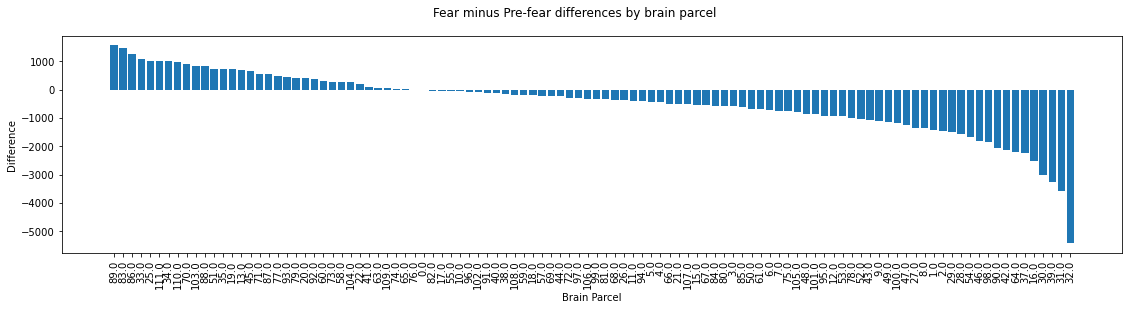

In [25]:
#sort in descending order
plt.figure(figsize=(19, 4))
plt.bar(sorted_regions.astype('str'), height=sorted_diffs)
plt.suptitle("Fear minus Pre-fear differences by brain parcel")
plt.ylabel("Difference")
plt.xlabel("Brain Parcel")
plt.xticks(rotation=90)
plt.show()

# Compare atlas regions to correlation coefficients 

In [20]:
# #load correlation arrays
# corrs_og = np.load("corrs_og.npy")

# flatlas = BU.flatten(atlas)
# # for each region of the atlas 
# parcel_corrs = np.zeros(regions.shape)
# for i, region in enumerate(regions): 
#     # average all the correlations that correspond with that region
#     parcel_corrs[i] = np.average(corrs_og[flatlas==region])
    

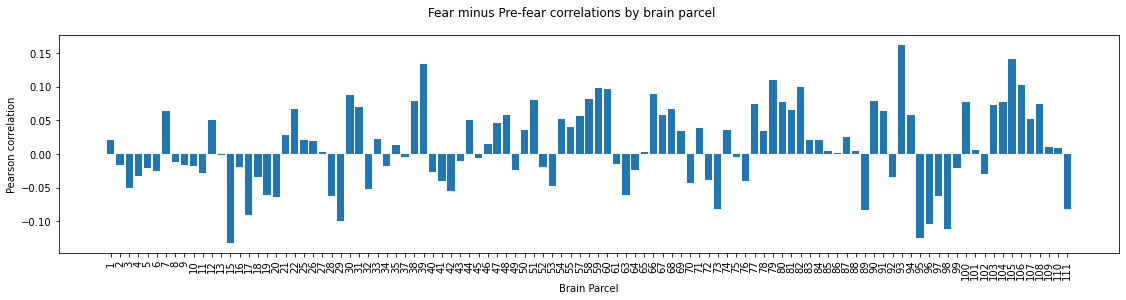

In [21]:
# plt.figure(figsize=(19, 4))
# plt.bar(regions.astype('int').astype('str'), height=parcel_corrs)
# plt.suptitle("Fear minus Pre-fear correlations by brain parcel")
# plt.ylabel("Pearson correlation")
# plt.xlabel("Brain Parcel")
# plt.xticks(rotation=90)
# plt.show()

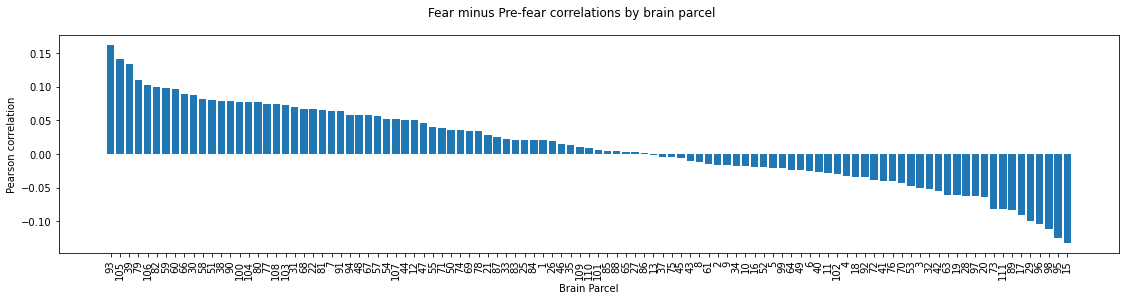

In [22]:
# #sort in descending order
# sort_inds = np.flip(np.argsort(parcel_corrs))
# sorted_regions = regions.ravel()[sort_inds.reshape(regions.shape)]
# sorted_corrs = parcel_corrs.ravel()[sort_inds.reshape(parcel_corrs.shape)]

# plt.figure(figsize=(19, 4))
# plt.bar(sorted_regions.astype('int').astype('str'), height=sorted_corrs)
# plt.suptitle("Fear minus Pre-fear correlations by brain parcel")
# plt.ylabel("Pearson correlation")
# plt.xlabel("Brain Parcel")
# plt.xticks(rotation=90)
# plt.show()

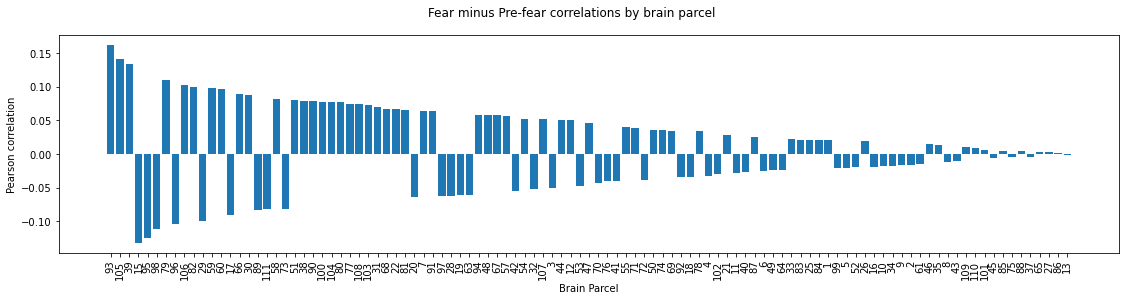

In [23]:
# #sort by magnitude 
# sort_inds = np.flip(np.argsort(np.abs(parcel_corrs)))
# sorted_regions = regions.ravel()[sort_inds.reshape(regions.shape)]
# sorted_corrs = parcel_corrs.ravel()[sort_inds.reshape(parcel_corrs.shape)]

# plt.figure(figsize=(19, 4))
# plt.bar(sorted_regions.astype('int').astype('str'), height=sorted_corrs)
# plt.suptitle("Fear minus Pre-fear correlations by brain parcel")
# plt.ylabel("Pearson correlation")
# plt.xlabel("Brain Parcel")
# plt.xticks(rotation=90)
# plt.show()

# Compare atlas regions to correlation coefficients, by KO vs WT 

In [24]:
# # load
# corrs_KO = np.load("corrs_KO.npy")
# corrs_WT = np.load("corrs_WT.npy")

In [26]:
# flatlas = BU.flatten(atlas)

# # average corrs by region 
# # WT 
# # for each region of the atlas 
# parcel_WT_corrs = np.zeros(regions.shape)
# for i, region in enumerate(regions): 
#     # average all the correlations that correspond with that region
#     parcel_WT_corrs[i] = np.average(corrs_WT[flatlas==region])


# # KO 
# # for each region of the atlas 
# parcel_KO_corrs = np.zeros(regions.shape)
# for i, region in enumerate(regions): 
#     # average all the correlations that correspond with that region
#     parcel_KO_corrs[i] = np.average(corrs_KO[flatlas==region])


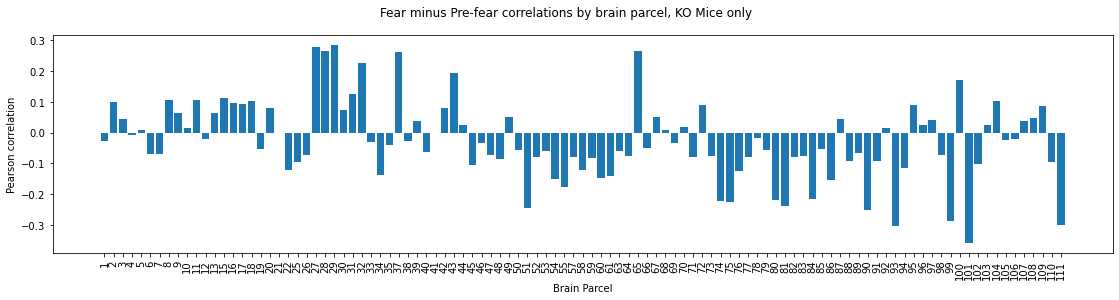

In [27]:
# #sort in descending order
# plt.figure(figsize=(19, 4))
# plt.bar(regions.astype('int').astype('str'), height=parcel_KO_corrs)
# plt.suptitle("Fear minus Pre-fear correlations by brain parcel, KO Mice only")
# plt.ylabel("Pearson correlation")
# plt.xlabel("Brain Parcel")
# plt.xticks(rotation=90)
# plt.show()

In [29]:
# #sort in descending order
# sort_inds = np.flip(np.argsort(parcel_KO_corrs))
# sorted_regions = regions.ravel()[sort_inds.reshape(regions.shape)]
# sorted_corrs = parcel_KO_corrs.ravel()[sort_inds.reshape(parcel_KO_corrs.shape)]
# sorted_abbrs = nums_to_abbrs(sorted_regions, num_to_abbr)


# plt.figure(figsize=(19, 4))
# plt.bar(sorted_abbrs, height=sorted_corrs)
# plt.suptitle("Fear minus Pre-fear correlations by brain parcel, KO mice only")
# plt.ylabel("Pearson correlation")
# plt.xlabel("Brain Parcel")
# plt.xticks(rotation=90)
# plt.show()

NameError: name 'num_to_abbr' is not defined

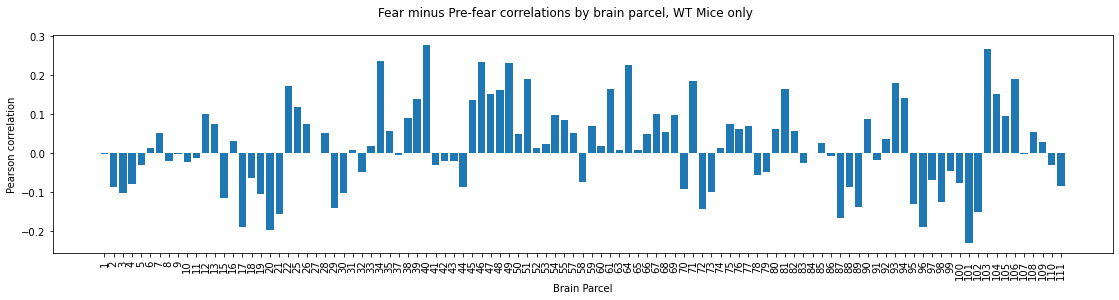

In [112]:
# #sort in descending order
# plt.figure(figsize=(19, 4))
# plt.bar(regions.astype('int').astype('str'), height=parcel_WT_corrs)
# plt.suptitle("Fear minus Pre-fear correlations by brain parcel, WT Mice only")
# plt.ylabel("Pearson correlation")
# plt.xlabel("Brain Parcel")
# plt.xticks(rotation=90)
# plt.show()

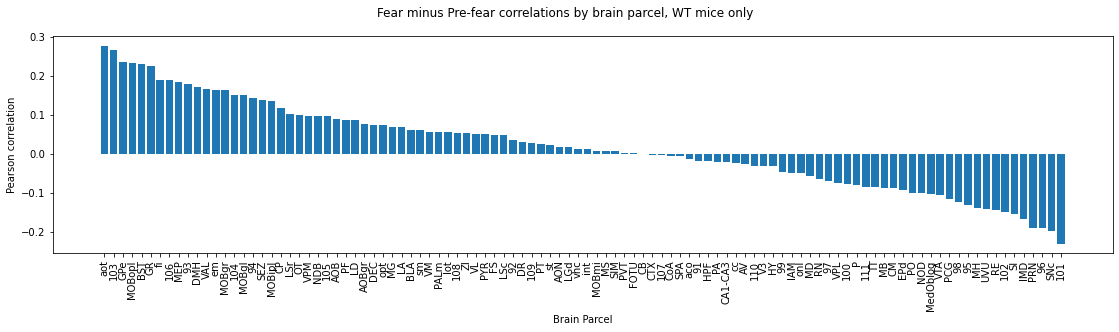

In [102]:
# #sort in descending order
# sort_inds = np.flip(np.argsort(parcel_WT_corrs))
# sorted_regions = regions.ravel()[sort_inds.reshape(regions.shape)]
# sorted_corrs = parcel_WT_corrs.ravel()[sort_inds.reshape(parcel_WT_corrs.shape)]
# sorted_abbrs = nums_to_abbrs(sorted_regions, num_to_abbr)

# plt.figure(figsize=(19, 4))
# plt.bar(sorted_abbrs, height=sorted_corrs)
# plt.suptitle("Fear minus Pre-fear correlations by brain parcel, WT mice only")
# plt.ylabel("Pearson correlation")
# plt.xlabel("Brain Parcel")
# plt.xticks(rotation=90)
# plt.show()